In [1]:
from erddapy import ERDDAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})
import seaborn as sns
import config
from data_functions import *

## Background

Chlorophyll a (chl a) is a green pigment found in phytoplankton, the primary producers of the ocean. It plays a crucial role in photosynthesis - converting sunlight into organic carbon, which supports the marine food web. Chl a concentration is widely used as a proxy for phytoplankton biomass and, by extension, primary production in the ocean. 

Since chl a is essential for this photosynthesis, its concentration is a reliable indicator of phytoplankton abundance and, consequently, primary production levels. Higher chl a concentrations typically indicate higher phytoplankton biomass and increased primary production.
Chl a concentrations vary significantly with time and location. Spatially, chl a concentrations can differ between coastal and open ocean regions, influenced by factors such as upwelling, nutrient availability, and water temperature.

In OOI Data Lab 7, students explore how chl a concentrations change over time. IN this lab extension, students will explore regional differences in timing of and the variables associated with seasonal phytoplankton bloom.

By analyzing data from the Ocean Observatories Initiative, students can investigate seasonal patterns in chl a, examine its relationship with abiotic factors like irradiance, nitrate, and temperature, and develop hypotheses about primary production in various oceanic settings. This hands-on approach enhances understanding of oceanographic processes and fosters data literacy skills essential for addressing complex ocean-related questions.


# Instructions
## Step 1: Load Data

The OOI Data Explorer contains over hundreds of datasets compiled across 9 arrays. We will be focusing on two locations, Station Pioneer and Station Irminger. (add photo of stations here)

These two stations have biotic and abiotic measurements from different measurements. To analyze the patterns of productivity, we will use time series of chlorophyll data from 2019-2023. In addition, we will use measurements of temperature, light, and nitrate to explore the controllers and relationships of chlorophyll. You can check out these datasets at the following websites: 

Each dataset has an associated table ID to easily pull it from the database. We will be using the variables from each of the stations described in the table below. The associated table IDs are also provided so that you can check out all the available variables for each instrument on the [ERDDAP page](https://erddap.dataexplorer.oceanobservatories.org/erddap/tabledap/). 


| Station | Variable | ID |
| --- | --- | --- | 
| Pioneer | Chlorophyll and Temperature | ooi-cp04ossm-rid27-02-flortd000 |
| Pioneer | Light | ooi-cp01cnsm-sbd11-06-metbka000 |
| Pioneer | Nitrate | ooi-cp01cnsm-rid26-07-nutnrb000 |
| Irminger | Chlorophyll and Temperature | ooi-gi01sumo-sbd12-02-flortd000 |
| Irminger | Light | ooi-gi01sumo-sbd12-06-metbka000 |
| Irminger | Nitrate | ooi-gi01sumo-sbd11-08-nutnrb000 |

#### Run the following cell to read in our data:

In [2]:
# load all data
all_chl, all_no3, all_light = load_data()


In [4]:
# search = 'chlorophyll pioneer mooring'
# search_url = e.get_search_url(search_for = search)
# df = pd.read_csv(search_url)
# df[['Dataset ID','Title','Summary']]

# Learning Objective (LO) 1:
## Step 2: Plot the _chl a_ time series for Station Pioneer

Run the following code below and select Station "Pioneer" in the dropdown menu.

In [4]:
# create interactive plot with ipywidgets 
from ipywidgets import widgets
import altair as alt
import datetime as dt

# Determine global axis limits
time_domain = [all_chl['time'].min(), all_chl['time'].max()]
chl_domain = [all_chl['chl'].min(), all_chl['chl'].max()+1]

# Create selection interval
date_range = (dt.date(2021, 1, 1), dt.date(2022, 1, 1))
brush = alt.selection_interval(encodings=['x'], value={'x': date_range})

# keep colors consistent per station
color_scale = alt.Scale(domain=['Pioneer', 'Irminger'], range=['#1f77b4', '#ff7f0e'])

# Define interactive function
def plot_time_series(station='All'):
    # set font sizes
    base = alt.Chart(all_chl).mark_point().encode(
        x=alt.X('time:T', scale=alt.Scale(domain=time_domain), title='Time'),
        y=alt.Y('chl:Q', scale=alt.Scale(domain=chl_domain), title='Chlorophyll-a Concentration (µg/L)'),
        color=alt.Color('station:N', scale=color_scale),
        tooltip=['time:T', 'chl:Q', 'station:N']
    ).properties(
        width=700,
        height=400
    )

    if station != 'All':
        base = base.transform_filter(alt.datum.station == station)

    upper = base.encode(alt.X('time:T').scale(domain=brush))

    lower = base.properties(
        height=60
    ).add_params(brush)
    
    display(upper & lower)

# Create dropdown widget
station_selector = widgets.Dropdown(
    options=list(all_chl['station'].unique()) + ['All'],
    description='Station:',
    continuous_update=False
)
# Display interactive widget
display(widgets.interactive(plot_time_series, station=station_selector))

interactive(children=(Dropdown(description='Station:', options=('Pioneer', 'Irminger', 'All'), value='Pioneer'…

## LO1 Part 1 Questions:
__Interpretation Questions:__

1. Describe the overall trend in chlorophyll concentration over time for the Coastal Pioneer Array.

2. Identify any peaks or troughs in chlorophyll concentration. When do they occur?

3. How might these patterns relate to seasonal changes in the Western Temperate Atlantic Ocean?


## LO1 Part 1 Solutions: 

1. The overall trend should show seasonal variations in chlorophyll concentration, with peaks typically occurring in spring and fall.

2. Peaks should be visible in spring and fall, with troughs in winter and summer. Specific timing may vary slightly year to year.

3. Patterns likely relate to seasonal changes in light availability, water temperature, and nutrient upwelling. Spring and fall blooms are common in temperate regions due to optimal conditions for phytoplankton growth.

## Step 3: Compare the Station Pioneer and Station Irminger _chl a_ time series

In the dropdown menu of the plot above, select "All" to plot the time series together. 

## LO1 Part 2 Questions

__Interpretation Questions:__

1. Describe the overall trends in chlorophyll concentration over time for both locations. How do they differ?

2. Identify the timing of peak chlorophyll concentrations in each location. What might explain any differences?

3. Compare the magnitude of chlorophyll concentrations between the two sites. What factors could contribute to these differences?

4. How might the latitude and coastal proximity of each location influence the observed patterns in chlorophyll concentration?

5. Based on your plot, hypothesize how the timing and duration of phytoplankton blooms might differ between these two ocean basins.

6. What oceanographic features or processes specific to each location could be influencing the chlorophyll concentration patterns?

7. How might these differences in chlorophyll patterns affect higher trophic levels in each ecosystem?


## LO2 Part 2 Solutions

1. Coastal Pioneer typically shows more frequent fluctuations; Irminger Sea may show a more pronounced seasonal pattern.

2. Peak timing differences likely relate to latitude, light availability, coastal influences, and local oceanographic conditions.

3. Magnitude differences may be due to nutrient availability, water column stability, or local current systems. Coastal areas often have higher concentrations due to terrestrial nutrient inputs.

4. Coastal Pioneer: influenced by coastal processes, land-sea interactions. Irminger Sea: more influenced by open ocean dynamics and higher latitude seasonal light variations.

5. Coastal Pioneer likely has more frequent, smaller blooms; Irminger Sea may have fewer, more intense bloom periods.

6. Coastal Pioneer: coastal upwelling, river inputs, shelf dynamics. Irminger Sea: deep winter mixing, subarctic conditions, potential influence of the North Atlantic subpolar gyre.

7. Differences may affect migration patterns, breeding cycles, and overall productivity of fish and marine mammal populations in each ecosystem.


## Background

# Learning Objective #2
How do Temperature, Light, and Nitrate change with Chlorophyll?


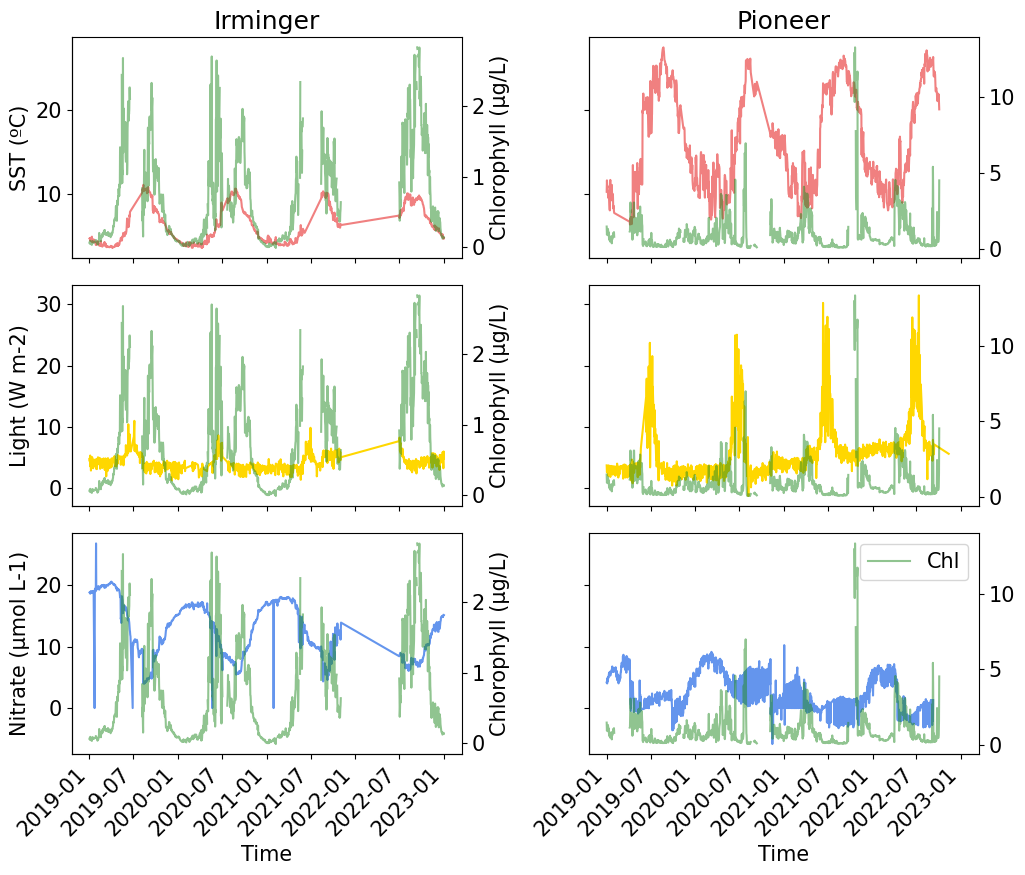

In [5]:
# merge datasets together
chl_light_df = pd.merge(all_chl, all_light, how='outer')
all_df = pd.merge(chl_light_df, all_no3, how='outer')
# melt wide to long
all_df_long = pd.melt(all_df, id_vars=['time', 'station', 'chl'], value_vars=['sst', 'light', 'no3'], var_name = 'measurement', value_name  = 'value')

# plot
g = sns.FacetGrid(all_df_long, row='measurement', col='station', hue='measurement', sharey='row', height=3, aspect=1.75)
g.map(sns.lineplot, 'time', 'value')

# custom colors (irradiance: puke yellow, temp: dark pink/light red, nitrate: blue, chl: green)
colors= ['lightcoral','lightcoral','gold','gold','cornflowerblue','cornflowerblue']
measurements = ['SST (ºC)', 'sst', 'Light (W m-2)','Light (W m-2)','Nitrate (µmol L-1)', 'no3']
# add legend
# Customize the colors for each row
i=0
# Add the "chl" column as a line for each station
for ax in g.axes.flat:
  ax.lines[0].set_color(colors[i])
  ax.legend().remove()
  # get station name
  station = ax.get_title().split('=')[2].strip()
  chl_data = all_chl[all_chl["station"] == station]
  # make a twin axes
  twinax=ax.twinx()
  twinax.plot(chl_data["time"], chl_data["chl"], label='Chl', c='forestgreen', alpha=0.5)
  # rotate xticks
  plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
  # remove title
  ax.set_title("")
  # add title only for stations at the top
  if i < 2:
    ax.set_title(station)
  # add y value for each measurement
  if i % 2 ==0:
    ax.set_ylabel(measurements[i])
    twinax.set_ylabel('Chlorophyll (µg/L)')
  i+=1

twinax.legend()
# g.add_legend(title='Measurement')
g.set_xlabels("Time")
plt.tight_layout()
plt.show()

In [123]:
# Create the base chart for 'chl'
chl_chart = alt.Chart(all_df_long).mark_line(color='#57A44C', opacity = 0.75).encode(
    x='time:T',
    y=alt.Y('chl:Q', axis=alt.Axis(title='Chlorophyll (µg / L)', titleColor='#57A44C', orient = 'right')),
    tooltip=['time', 'station', 'measurement', 'chl']
).properties(width=200, height=150)

# Create the base chart for 'value'
value_chart = alt.Chart(all_df_long).mark_line(opacity = 0.75).encode(
    x='time:T',
    y=alt.Y('value:Q', axis=alt.Axis(orient='left'), title = None),
    color='measurement',
    tooltip=['time', 'station', 'measurement', 'value']
).properties(width=200, height=150)

# Combine both charts using layer and resolve axes
combined_chart = alt.layer(chl_chart, value_chart)

# Facet by station and measurements
faceted_chart = combined_chart.facet(
    row='measurement:N',
    column='station:N'
).configure_axis(
    labelFontSize=12,
    titleFontSize=14
).configure_facet(
    spacing=10
).configure_view(
    stroke=None
).interactive()

faceted_chart = faceted_chart.configure_header(
    titleFontSize=12,
    labelFontSize=14)

faceted_chart.show()

alt.FacetChart(...)

In [66]:
alt.data_transformers.disable_max_rows()
# Create the base chart for 'chl'
# chl_chart = alt.Chart(all_df_long).mark_line(color='blue').encode(
#     x='time:T',
#     y=alt.Y('chl:Q', axis=alt.Axis(title='Chlorophyll (chl)', titleColor='blue')),
#     tooltip=['time', 'station', 'measurement', 'chl']
# ).properties(width=200, height=150)

# create measurements chart
chl = alt.Chart(all_df_long).mark_point(color='green').encode(
    x = 'time', 
    y = 'chl',
    row = 'measurement',
    column = 'station',
    color = 'chl'
).properties(
    width = 200,
    height = 200
)

# create measurements chart
measurements = alt.Chart(all_df_long).mark_point().encode(
    x = 'time', 
    y = 'value',
    row = 'measurement',
    column = 'station',
    color = 'measurement'
).properties(
    width = 200,
    height = 200
)

combined_chart = alt.layer(chl, measurements).resolve_scale(y='independent')

TypeError: Faceted charts cannot be layered. Instead, layer the charts before faceting.

## LO2 Questions

__Interpretation Questions:__
1. What are the main differences in chlorophyll concentration patterns between the two locations?

2. How do the patterns of irradiance, temperature, and nitrate concentration compare between the two sites?

3. Which environmental factor(s) appear to have the strongest influence on chlorophyll concentrations at each location? Explain your reasoning.

4. How well do your observations support or refute your initial hypothesis?

__Application Questions:__

5. What other factors not measured here might influence phytoplankton bloom dynamics?

6. How might the differences in environmental conditions and bloom dynamics affect the broader ecosystem at each location?

7. Based on your findings, predict how climate change might impact phytoplankton blooms at these two locations.


## LO2 Solutions

1. Coastal Pioneer likely shows more frequent fluctuations and potentially multiple blooms per year. Irminger Sea may show a single, more pronounced summer bloom.

2. Irradiance patterns will show more extreme seasonal variations at the higher-latitude Irminger Sea. Temperature fluctuations may be greater at the Coastal Pioneer. Nitrate patterns may show depletion during bloom periods at both sites.

3. Answers may vary, but students should consider the timing of changes in each variable relative to chlorophyll concentrations. For example, increasing irradiance and temperature, coupled with high nitrate levels, often precede blooms.

4. Evaluation should be based on the student's specific hypothesis and the patterns observed in their data analysis.

5. Possible factors include water column stratification, micronutrient availability (e.g., iron), grazing pressure, and ocean circulation patterns.

6. Differences may affect the timing and duration of productive periods, influencing the entire food web, including fish populations and marine mammals.

7. Predictions should consider potential changes in temperature, stratification, and nutrient cycling. For example, warming might lead to earlier spring blooms at the Coastal Pioneer or extend the productive season in the Irminger Sea.
